In [1]:
from collections import defaultdict
from unicodedata import normalize as unicodeNormalize
import regex as re

from nltk.util import pad_sequence
from nltk.util import bigrams
from nltk.util import ngrams
from nltk.util import everygrams
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm.preprocessing import flatten

In [2]:
# import os
# script_dir = os.path.dirname(__file__)

In [3]:
suffixesList = [ 
    "්", 
    "ා", 
    "ැ", 
    "ෑ", 
    "ි", 
    "ී", 
    "ු", 
    "ූ", 
    "ෙ", 
    "ේ", 
    "ෛ", 
    "ො", 
    "ෝ" ,
    "ෞ",
    "ෘ",
    "ෲ",
    "ං"
    ]

In [4]:
def tokenize(text):
    tokens = []
    li = 1
    while li < len(text):
    # for li in range(1, len(text)):
        prevChar, currentChar = text[li - 1], text[li]
        if(currentChar == '\u200d'):
                if(li < len(text) - 1):
                    if(prevChar == suffixesList[0] and (text[li + 1] == 'ර' or text[li + 1] == 'ය' or text[li + 1] == 'ද')):
                        tokens.append(tokens.pop()+currentChar+text[li + 1])
                        li += 1
        elif(currentChar in suffixesList):
            if(li != 1):
                tokens.append(f"{tokens.pop()}{currentChar}")
            else:
                tokens.append(f"{prevChar}{currentChar}")
        else:
            if(li == 1):
                tokens.append(prevChar)
            tokens.append(currentChar)
        li += 1
    return tokens

In [5]:
lines = []
with open('c:\\Users\\Yasith\\Documents\\GitHub\\FYP-Omega\\Data/combined all names - cleaned - train.txt', 'r', encoding='utf-8') as f:
    for line in f.readlines():
        line = re.sub(r'[^\w]|_|[a-zA-Z]|\u200c', ' ', line)
        line = unicodeNormalize("NFC", line.strip())
        for sub in line.split():
            sub = tokenize(sub)
            if(len(sub) > 1):
                lines.append(sub)

In [6]:
list(bigrams(pad_both_ends(lines[0], n=2)))

[('<s>', 'වි'), ('වි', 'තා'), ('තා', 'න'), ('න', 'ගේ'), ('ගේ', '</s>')]

In [7]:
bigrams(pad_both_ends(lines[0], n=2))

<generator object bigrams at 0x00000199EF8AC970>

In [8]:
from nltk.lm import KneserNeyInterpolated
from nltk.lm.preprocessing import padded_everygram_pipeline

n = 2
train_data, padded_sents = padded_everygram_pipeline(n, lines)

model = KneserNeyInterpolated(n)
model.fit(train_data, padded_sents)
len(model.vocab)

680

In [24]:
#model.score('<s>', 'අං')
#model.counts[['<s>']]['අං']
model.score('</s>', ['ත්'])*model.score('ත්', ['සි'])*model.score('සි', ['ය​'])*model.score('ය', ['<s>'])

0.003062794055214776

In [29]:
model.perplexity(list(bigrams(pad_both_ends(lines, n=2))))

676.097690815458

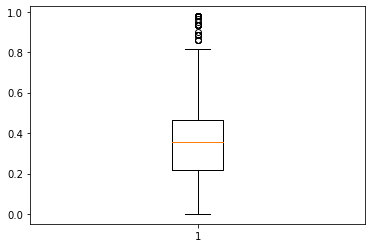

In [39]:
import matplotlib.pyplot as plt
scores=[]
for word in test_dataset:
    starting = word[:]
    starting.insert(0, '<s>')
    scores.append(model.score('</s>', starting))

plt.boxplot(scores)
plt.show()